In [1]:
# importing the necessary libraries:
import warnings
warnings.filterwarnings("ignore")
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scrublet as scr
import leidenalg

In [2]:
# loading the 24hr h5ad file:
adata_24hr = ad.read_h5ad("../data/from_arnolda/24hr-ear-S1.h5ad")
adata_24hr
# adding the '24 hours' as a new column to the corresponding h5ad.obs file:
adata_24hr.obs['time_point'] = '24 hours'
adata_24hr.write('modified_24hr.h5ad')
adata_24hr = ad.read_h5ad("/Users/z5493368/PhD/projects/Neutrophil Arnolda/scripts/modified_24hr.h5ad")
adata_24hr
print(adata_24hr.obs_names)
adata_24hr.obs
# Add 'Wound_' to the beginning and '_1' to the end of each index
adata_24hr.obs_names = 'Wound_' + adata_24hr.obs_names.astype(str) + '_1'

# Check the result
print(adata_24hr.obs_names)

Index(['56', '65', '67', '413', '420', '1158', '2331', '2366', '3090', '3138',
       ...
       '14041382', '14041762', '14042519', '14042580', '14042946', '14043285',
       '14043313', '14043356', '14044817', '14044828'],
      dtype='object', length=6249)
Index(['Wound_56_1', 'Wound_65_1', 'Wound_67_1', 'Wound_413_1', 'Wound_420_1',
       'Wound_1158_1', 'Wound_2331_1', 'Wound_2366_1', 'Wound_3090_1',
       'Wound_3138_1',
       ...
       'Wound_14041382_1', 'Wound_14041762_1', 'Wound_14042519_1',
       'Wound_14042580_1', 'Wound_14042946_1', 'Wound_14043285_1',
       'Wound_14043313_1', 'Wound_14043356_1', 'Wound_14044817_1',
       'Wound_14044828_1'],
      dtype='object', length=6249)


In [3]:
adata_24hr.X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8146628 stored elements and shape (6249, 25831)>

In [4]:
# loading the 7day  h5ad file:
adata_7day = ad.read_h5ad("../data/from_arnolda/7day-ear-S2-tg.h5ad")
adata_7day
# adding the '7 day' as a new column to the corresponding h5ad.obs file:
adata_7day.obs['time_point'] = '7 day'
adata_7day.write('modified_7day.h5ad')
adata_7day = ad.read_h5ad("/Users/z5493368/PhD/projects/Neutrophil Arnolda/scripts/modified_7day.h5ad")
adata_7day.obs
print(adata_7day.obs_names)
# Add 'Wound_' to the beginning and '_0' to the end of each index
adata_7day.obs_names = 'Wound_' + adata_7day.obs_names.astype(str) + '_0'

# Check the result
print(adata_7day.obs_names)

Index(['8', '1185', '2002', '5043', '5440', '5846', '6542', '6586', '6990',
       '7714',
       ...
       '14029080', '14032187', '14034889', '14035979', '14039823', '14040237',
       '14040665', '14041055', '14043724', '14043725'],
      dtype='object', length=3298)
Index(['Wound_8_0', 'Wound_1185_0', 'Wound_2002_0', 'Wound_5043_0',
       'Wound_5440_0', 'Wound_5846_0', 'Wound_6542_0', 'Wound_6586_0',
       'Wound_6990_0', 'Wound_7714_0',
       ...
       'Wound_14029080_0', 'Wound_14032187_0', 'Wound_14034889_0',
       'Wound_14035979_0', 'Wound_14039823_0', 'Wound_14040237_0',
       'Wound_14040665_0', 'Wound_14041055_0', 'Wound_14043724_0',
       'Wound_14043725_0'],
      dtype='object', length=3298)


In [5]:
adata_7day.X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1436517 stored elements and shape (3298, 21446)>

In [6]:
# loading the resting_ear h5ad file:
adata_blood = ad.read_h5ad("../data/from_arnolda/resting-ear-S3-tg.h5ad")
adata_blood
# adding the 'resting ear' as a new column to the corresponding h5ad.obs file:
adata_blood.obs['time_point'] = 'Blood'
adata_blood.write('modified_blood.h5ad')
adata_blood = ad.read_h5ad("/Users/z5493368/PhD/projects/Neutrophil Arnolda/scripts/modified_blood.h5ad")
adata_blood.obs
print(adata_blood.obs_names)

# Add 'Wound_' to the beginning and '_2' to the end of each index
adata_blood.obs_names = 'Wound_' + adata_blood.obs_names.astype(str) + '_2'

# Check the result
print(adata_blood.obs_names)

Index(['2677', '4603', '5248', '7959', '10690', '12575', '13592', '21891',
       '28255', '53915',
       ...
       '56550234', '56562563', '56563359', '56565891', '56576762', '56604727',
       '56612629', '56613378', '56614974', '56616476'],
      dtype='object', length=9814)
Index(['Wound_2677_2', 'Wound_4603_2', 'Wound_5248_2', 'Wound_7959_2',
       'Wound_10690_2', 'Wound_12575_2', 'Wound_13592_2', 'Wound_21891_2',
       'Wound_28255_2', 'Wound_53915_2',
       ...
       'Wound_56550234_2', 'Wound_56562563_2', 'Wound_56563359_2',
       'Wound_56565891_2', 'Wound_56576762_2', 'Wound_56604727_2',
       'Wound_56612629_2', 'Wound_56613378_2', 'Wound_56614974_2',
       'Wound_56616476_2'],
      dtype='object', length=9814)


In [7]:
adata_blood.X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 19276795 stored elements and shape (9814, 27450)>

In [8]:
# making a dictionary called somedict to organise and group different AnnData objects, represnting Sc-RNA seq data from different time points:
somedict = {"24 hr" : adata_24hr , "7 day" : adata_7day , "Blood" : adata_blood}

In [9]:
# concatenating multiple AnnData objects stored in the dictionary "somedict"; the argument, join = "outer" specifies how to handle the merging of different datasets based on their features (e.g. genes), to ensure that all features from all datasets are included in the final concatenated AnnData object; if using, join = "inner", then only common genes between all datasets are kept and any genes that is not present in all datasets will be discarded, which may lead to loss of potentially valuable data if genes only appear in certain datasets but not all
adata = ad.concat(somedict, label = "time_point", join = "outer")
adata.write('../data/from_arnolda/secondpaper.h5ad')

In [10]:
# changing the name of the adata to a more specific one; sp refers to second paper
wound = adata 

In [11]:
# appending a suffix to any duplicated observation names, ensuring that all cell names are unique and keep data clean. this is specially important when you concatenate multiple datasets and there is a chance that cells from different datasets have the same identifiers, which can cause conflicts. 
wound.obs_names_make_unique()

In [12]:
# annotate mitochondrial, ribosomal and hemoglobin genes in 'sp.var'
wound.var["mt"] = wound.var_names.str.startswith("mt-")
wound.var["ribo"] = wound.var_names.str.startswith(("RPS" , "RPL"))
wound.var["hb"] = wound.var_names.str.contains("^Hba-|^Hbb-") 

In [13]:
# calculate QC matrics; computes various quality control metrics for cells (obs) and genes (var) in an AnnData object; the goal is to assess the quality of the data, which helps in filtering out low-quality cells or other problematic aspects of the dataset; inplace = True; the function will update sp in place meaning that the QC metrics will be added directly to the obs & var. log1p=True; to reduce the impact of very large values or to make sure that the metrics take into accouunt the logged values rather than the raw count data
sc.pp.calculate_qc_metrics(wound, qc_vars = ["mt", "ribo", "hb"], inplace = True, log1p = True)

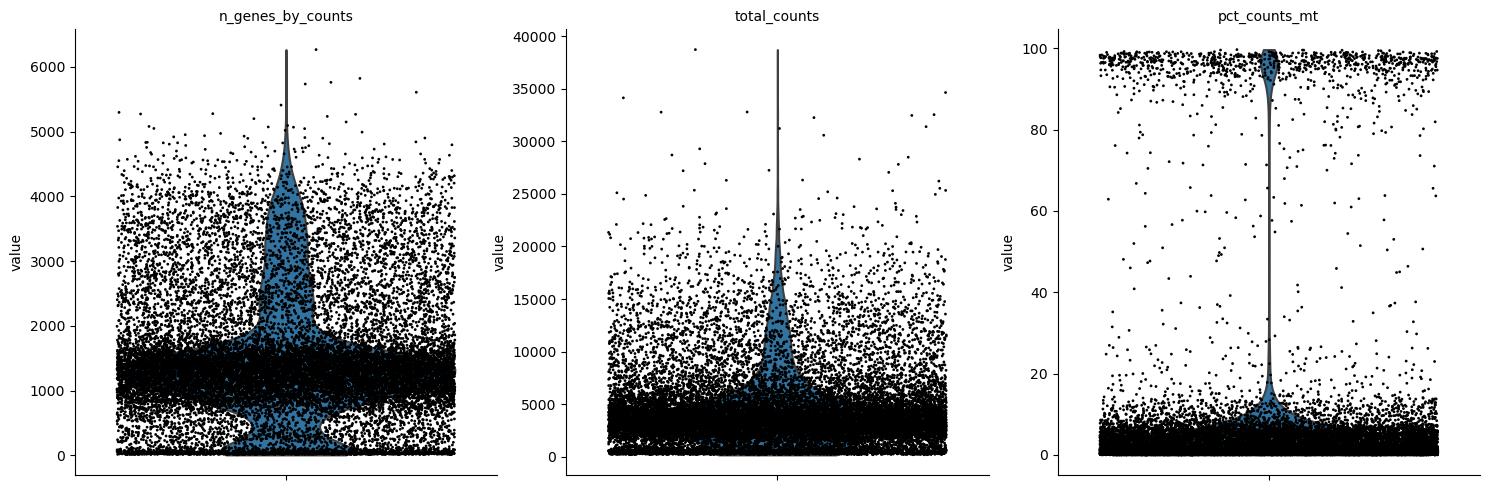

In [14]:
# violin plots; displays the distribution of a variable for each cell by showing both density and the spread of the data, which helps identify patterns and potential outliers; n_genes_by_counts; the number of genes detected per cell so as to assess the richness of gene expression in each cell. jitter = 0.4; this helps spread out overlapping points and seeing the distribution more clearly, especially when many cells have similar values. multi_panel = True; creates separate violin plots for each variable and therefore the comparison easier and clearer
sc.pl.violin(
    wound,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    size=2,
    show=False
)
# saving the violin plot as a PNG file:
plt.savefig('violin_plot.png', dpi=300)
plt.show()

In [15]:
import pandas as pd

# Group data by time point and calculate summary statistics for total RNA counts
library_size_stats = wound.obs.groupby("time_point")["total_counts"].describe()

# Display the results
print(library_size_stats)

             count         mean          std     min     25%     50%      75%  \
time_point                                                                      
24 hr       6249.0  4775.954873  3845.355961  1227.0  2704.0  3755.0  5144.00   
7 day       3298.0  1144.357186  1366.600182   178.0   399.0   688.0  1225.50   
Blood       9814.0  5573.205727  3728.452925  1440.0  3123.0  4082.5  6829.25   

                max  
time_point           
24 hr       38726.0  
7 day       15190.0  
Blood       34138.0  


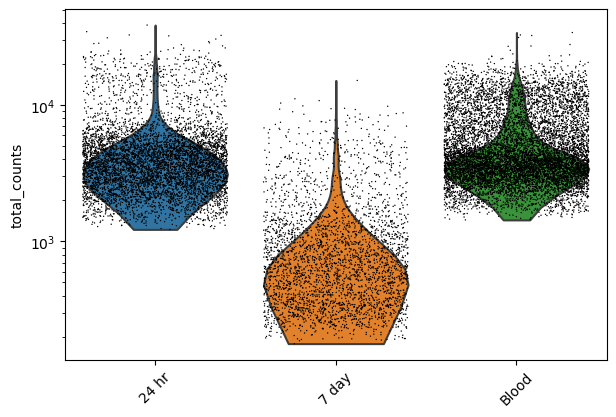

In [16]:
sc.pl.violin(wound, keys="total_counts", groupby="time_point", log=True, jitter=0.4, rotation=45)

In [17]:
# Filter Cells Based on Library Size (UMI Counts)
sc.pp.filter_cells(wound, min_counts=1000)
sc.pp.filter_cells(wound, max_counts=40000)

In [18]:
# Filter Cells Based on Library Size (UMI Counts)
#sc.pp.filter_cells(adata, min_counts=1000)
#sc.pp.filter_cells(adata, max_counts=40000)


In [19]:
# filtering cells that express less than 100 genes and filtering genes that are expressed in less than three cells:
sc.pp.filter_cells(wound, min_genes=100)
sc.pp.filter_genes(wound, min_cells=3)

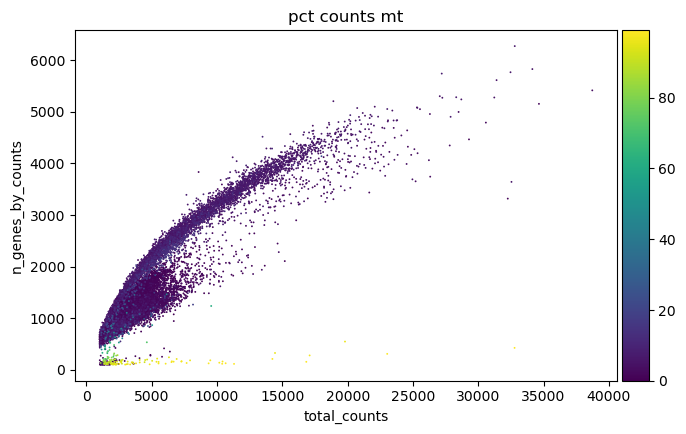

In [20]:
# creating a scatter plot; exploring the distribution of total counts and the number of genes detected per cell, with colours representing the % of mitochondrial gene counts
sc.pl.scatter(wound, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [21]:
# doublet detection using Scrublet method; expected_doublet_rate = 0.06; this is a parameter that specifies the expected rate of doublets in the dataset and 0.06 means you expect about 6% of the cells in data to be doublets.
def run_scrublet(wound, batch_key=None, expected_doublet_rate=0.06, **kwargs):
     if batch_key:
        wound.obs['doublet_scores'] = np.nan
        wound.obs['predicted_doublets'] = np.nan
        
        for batch in wound.obs[batch_key].unique():
            batch_indices = wound.obs[batch_key] == batch
            counts_matrix = wound[batch_indices].X
            
            scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=expected_doublet_rate, **kwargs)
            doublet_scores, predicted_doublets = scrub.scrub_doublets()
            
            wound.obs.loc[batch_indices, 'doublet_scores'] = doublet_scores
            wound.obs.loc[batch_indices, 'predicted_doublets'] = predicted_doublets
            
        else:
            counts_matrix = wound.X
            scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=expected_doublet_rate, **kwargs)
            doublet_scores, predicted_doublets = scrub.scrub_doublets()
        
        wound.obs['doublet_scores'] = doublet_scores
        wound.obs['predicted_doublets'] = predicted_doublets

        return wound

In [22]:
# batch_key = 'time_point'; it loops over each unique time point in the dataset and run Scrublet on the subset of cells for each time point, and updates wound.obs with doublet_scores and predicted_doublets for each time point separately. After running the wound.obs is a DataFrame containing two new columns; doublet_scores: a numerical score for each cell indicating how likely it is to be a doublet and predicted_doublets: a boolean value, with True indicating a predicted doublet. 
wound = run_scrublet(wound, batch_key="time_point", expected_doublet_rate=0.06)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 6.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.0%
Elapsed time: 3.5 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 20.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.1%
Elapsed time: 0.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 49.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.3%
Elapsed time: 6.3 seconds
Preprocessing...
Simulating doublets..

In [23]:
# looking at the data:
wound

AnnData object with n_obs × n_vars = 16795 × 25223
    obs: 'time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'time_point_colors'
    obsm: 'X_tsne'

In [24]:
# looking at the doublet scores & predicted doublets:
wound.obs[['doublet_scores','predicted_doublets']]

,doublet_scores,predicted_doublets
Wound_56_1,0.009360,False
Wound_65_1,0.081721,False
Wound_67_1,0.011025,False
Wound_413_1,0.102575,False
Wound_420_1,0.066428,False
...,...,...
Wound_56604727_2,0.016182,False
Wound_56612629_2,0.049353,False
Wound_56613378_2,0.052499,False
Wound_56614974_2,0.006381,False


In [25]:
# filtering doublets:
wound = wound[wound.obs['predicted_doublets'] == False]

In [26]:
# filtering cells with high mitochondrial percentage; < 15: You're applying a threshold to keep only those cells where less than 15% of the total reads are mitochondrial. Cells with a high percentage of mitochondrial reads (often >10-20%) are usually considered low quality, as they may represent stressed or dying cells.
wound = wound[wound.obs['pct_counts_mt'] <15]

In [27]:
import pandas as pd

# Group data by time point and calculate summary statistics for total RNA counts
library_size_stats = wound.obs.groupby("time_point")["total_counts"].describe()

# Display the results
print(library_size_stats)
print(wound.shape)

             count         mean          std     min     25%     50%      75%  \
time_point                                                                      
24 hr       5895.0  4827.432740  3866.607834  1356.0  2754.0  3784.0  5152.00   
7 day        807.0  2674.360595  1914.953579  1000.0  1301.0  1862.0  3474.50   
Blood       9524.0  5522.748950  3657.059580  1492.0  3124.0  4059.5  6725.25   

                max  
time_point           
24 hr       38726.0  
7 day       15190.0  
Blood       34138.0  
(16226, 25223)


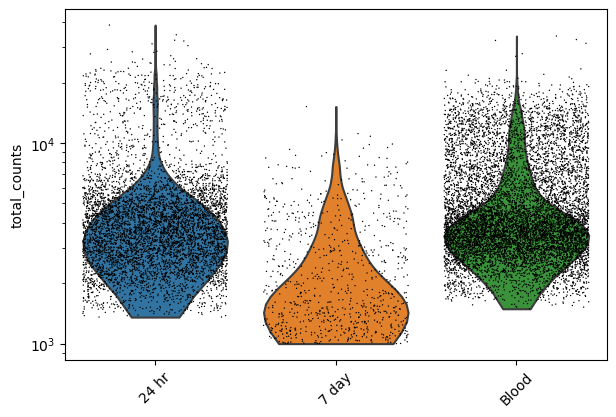

In [28]:
sc.pl.violin(wound, keys="total_counts", groupby="time_point", log=True, jitter=0.4, rotation=45)


In [29]:
# normalisation
# 1. saving the raw counts by creating a new layer called 'counts' in the wound AnnData object. the .layers attribute in an AnnData object alows you to store multiple versions of the data(e.g. raw counts, normalised data, etc.); wound.x.copy(): takes matrix stored in wound.X and makes a copy of it. it alos ensures that you are not just linking the original data but creating an independent copy, so changes to wound.layers["counts"] won't affect wound.X and vice versa. 
wound.layers["counts"] = wound.X.copy()
# 2. normalizing to median total counts
sc.pp.normalize_total(wound)
# 3. logarithmise the data
sc.pp.log1p(wound)

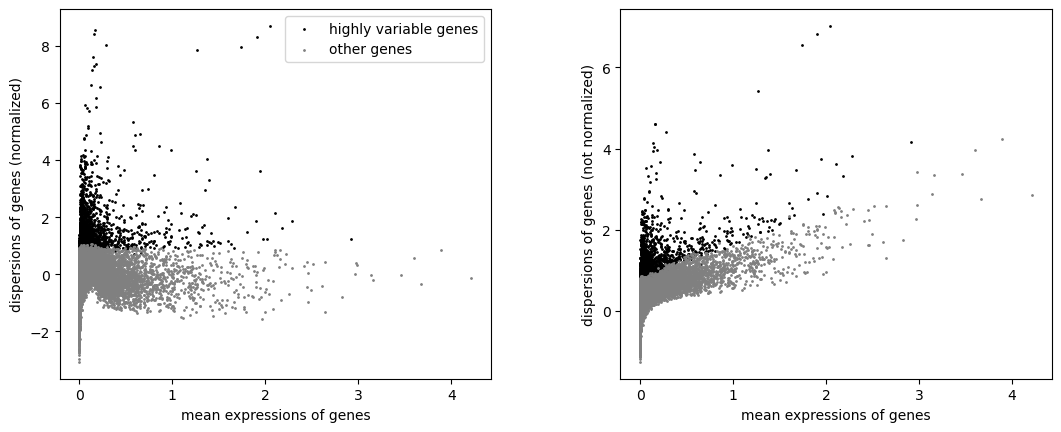

In [30]:
# feature selection; identifying highly variable genes (HVGs) in dataset, focusing on the top 2000 most variable genes while accounting for batch effects across different time points; specifying "time_point" as the batch variable.
sc.pp.highly_variable_genes(wound, n_top_genes=2000, batch_key="time_point")
sc.pl.highly_variable_genes(wound)

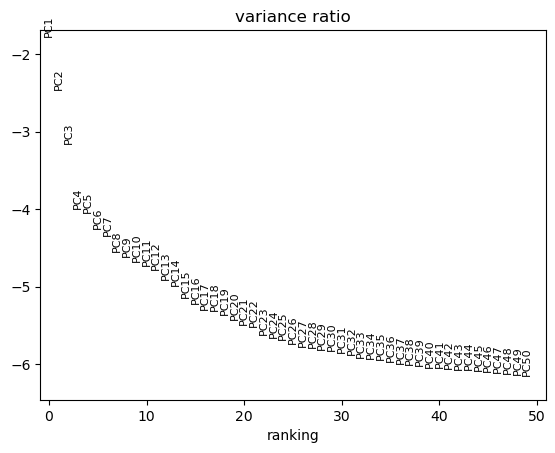

In [31]:
# dimentionality reduction by running PCA; this is to reduce the complexity of the data by focusing on components that capture the most variability
# variance ratio plot; helps you determine how many PCs you should keep for the downstream analysis, ideally you want to keep enough PCs to explain the majority of variance but discard those that contribute only marginallly
sc.tl.pca(wound)
sc.pl.pca_variance_ratio(wound, n_pcs=50, log=True)

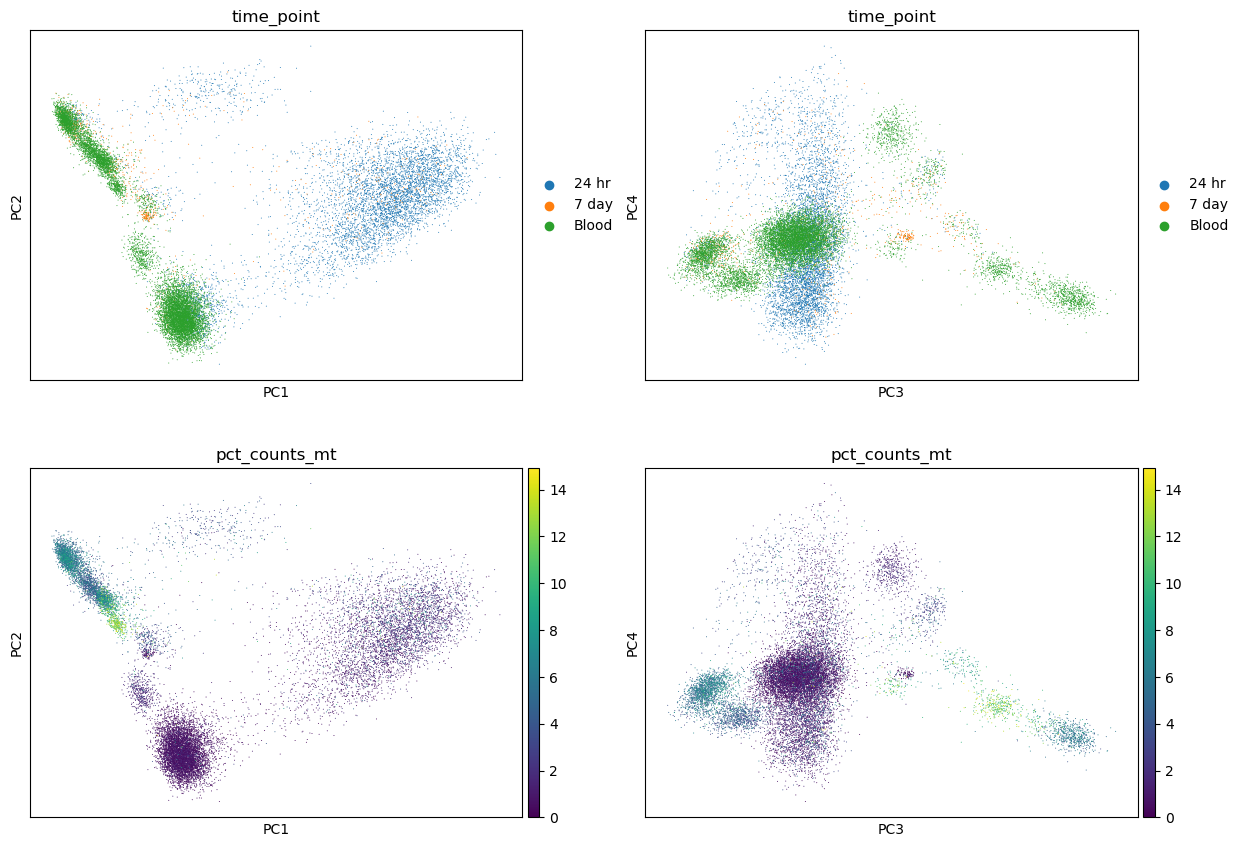

In [32]:
# generating scatter plots of the cells in PCA space using the data; cells are going to be coloured by spacific features in the dataset: "time_point" and the % of mt genes counts: "pct_counts_mt"; dimensions specifies which PCs to use in each plot, 0,1 refers to the first 2 PCs (PC1, PC2) and 2,3 refers to the next 2 PCs (PC2, PC3) so you will be making 4 PC scatter plot; the plot is going to be arranged in 2 columns. 
sc.pl.pca(
    wound,
    color=["time_point", "time_point", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [33]:
# computing a KNN graph for the cells in the dataset, based on their similarity in PCA space and identifying the neariest neighbors for each cell in the dataset, which is essential for downstream analysis, such as clustering and visualisation (UMAP, t-SNE)
sc.pp.neighbors(wound)

In [34]:
# computing a UMAP embedding for your AnData object, which is a dimantionality reduction tech that projects high-dimensional data into 2/3 dimensions for visualisation, preserving both structure and local relationships between cells; UMAP provides clear, interpretable view of the data, especially after clustering it helps you visualise how cells group together based on their expression profiles. It also preserves the local relationships between cells (similar cells stay close together), making it an excellent tool for exploring the structure of SCRNA-seq data. 
sc.tl.umap(wound)

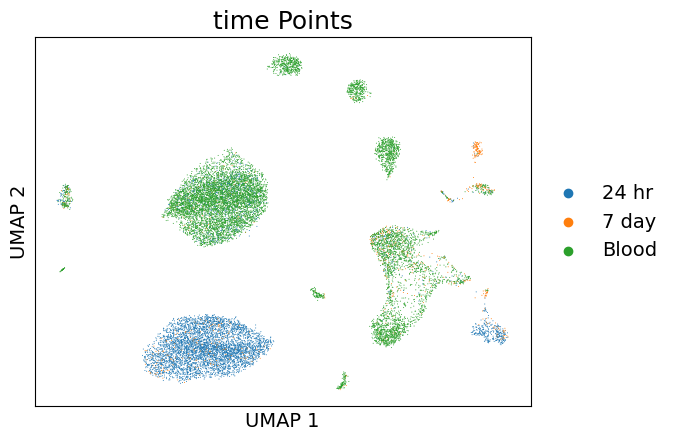

In [35]:
# visualising the UMAP and colouring the UMAP plot by time_pointimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scanpy as sc

# Adjust font sizes globally for consistency
plt.rcParams['axes.titlesize'] = 16  # Title font size
plt.rcParams['axes.labelsize'] = 14  # Axis label font size
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick font size
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick font size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

# Generate the UMAP plot with adjusted legend size
sc.pl.umap(
    wound,
    color="time_point",
    size=2,
    legend_fontsize=14,  # Specific adjustment for legend font size
    show=False  # Keep it hidden to add further customization
)

# Save and display the plot
plt.title("time Points", fontsize=18)  # Custom plot title
plt.xlabel("UMAP 1", fontsize=14)  # Custom x-axis label
plt.ylabel("UMAP 2", fontsize=14)  # Custom y-axis label
plt.savefig('UMAP_plot_with_legend.png', dpi=300)
plt.show()


In [36]:
# looking at the DataFrame
wound

AnnData object with n_obs × n_vars = 16226 × 25223
    obs: 'time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'time_point_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectiviti

In [37]:
# performing Leiden clustering on the wound dataset by first contructing the KNN graph, considering the number of neighbors 10 and using the 40 first PCs to compute the distance between cells. the KNN graph is stored in the .uns['neighbors'] attribute and will be used for clustering and visualisation. Second, running the Leiden algorithm to detect clusters of cells base on the KNN graph built in the first step. The Leiden alg assigns a cluster label to each cell, which is stored in the .obs['leiden'] column. 
sc.pp.neighbors(wound, n_neighbors=10, n_pcs=40)
sc.tl.leiden(wound, key_added = 'leiden', resolution = 0.3)

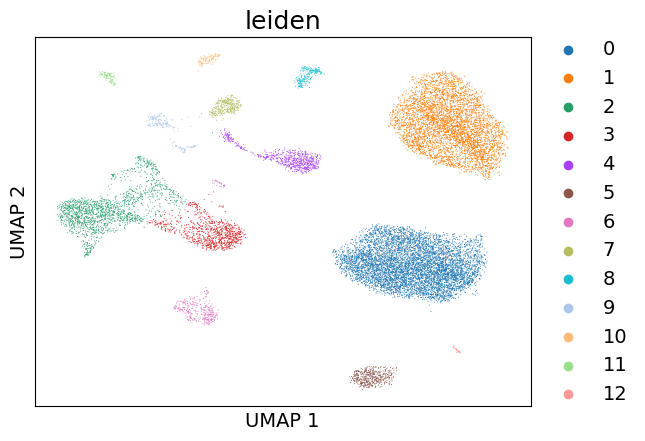

In [38]:
# visualising the clusters on UMAP, where cells are coloured according to their Leiden clusters allowing you to visually explore the distinct clusters in your data. 
import matplotlib.pyplot as plt
import scanpy as sc

# Adjust font sizes globally for consistency
plt.rcParams['axes.titlesize'] = 16  # Title font size
plt.rcParams['axes.labelsize'] = 14  # Axis label font size
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick font size
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick font size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

# Generate the UMAP plot with adjusted legend size
sc.tl.umap(wound)
sc.pl.umap(
    wound,
    color=["leiden"],
    size=2,
    legend_fontsize=14,  # Specific adjustment for legend font size
    show=False  # Keep it hidden to add further customization
)

# Save and display the plot
plt.title("leiden", fontsize=18)  # Custom plot title
plt.xlabel("UMAP 1", fontsize=14)  # Custom x-axis label
plt.ylabel("UMAP 2", fontsize=14)  # Custom y-axis label
plt.savefig('leiden_plot_with_legend.png', dpi=300)
plt.show()

In [52]:
import matplotlib.pyplot as plt

# Reset rcParams to default values
plt.rcParams.update(plt.rcParamsDefault)


In [53]:
# save the AnnData object
wound.write('wound_with_leiden_and_umap.h5ad')

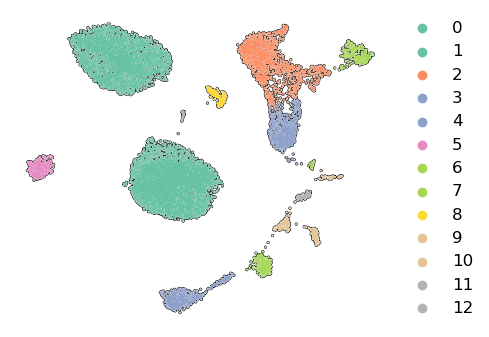

In [44]:
wound = sc.read('wound_with_leiden_and_umap.h5ad')
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.umap(wound, color=['leiden'], ax=ax, palette='Set2', add_outline=True, show=False)
ax.set(xlabel="", ylabel="")
ax.set_axis_off()
ax.title.set_visible(False)
ax.set_aspect(1.0)
fig.tight_layout()
plt.show()

In [43]:
adata=sc.read("secondpaper.h5ad")
# List any genes that include 'tdTomato'
[gene for gene in adata.var_names if 'tdtomato' in gene.lower()]
# List any genes that include 'kaede'
#[gene for gene in adata.var_names if 'kaede' in gene.lower()]

['tdTomato|AY678269.1|Synthetic']